# Exercises day 02

In [86]:
import numpy as np
import matplotlib.pyplot as plt

NUMS_TO_GENERATE = 10 ** 4

## Ex01

**Choose a value for the probability parameter $p$ in the geometric distribution and simulate $10,000$ outcomes. You can experiment with a small, moderate and large value if you like.**

Max of geometric dist: 9


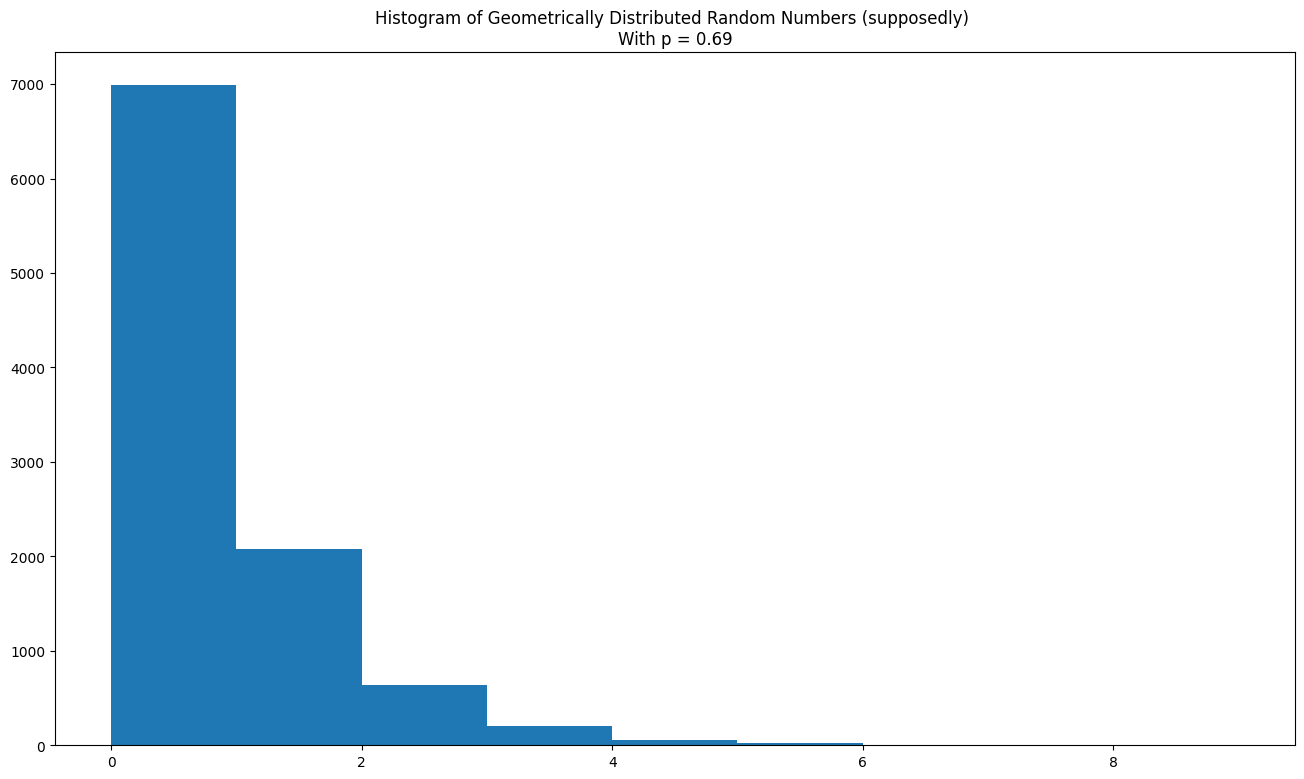

In [87]:
# We have been told that we can use a library to generate random numbers
# Tobias says that we should pick a fixed p in the the open interval (0,1)
p = 0.69

NUMS_TO_GENERATE = 10 ** 4

uniform_nums = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)
geometric_nums = np.floor(np.log(uniform_nums) / np.log(1 - p))


max_geometric = int(max(geometric_nums))
print(f"Max of geometric dist: {max_geometric}")

plt.figure(figsize=(16, 9))
plt.title(f"Histogram of Geometrically Distributed Random Numbers (supposedly) \nWith p = {p}")
plt.hist(geometric_nums, bins=range(max_geometric + 1))
plt.show()


### Experiments with different p-values

Max of geometric dist_0: 119
Max of geometric dist_1: 74
Max of geometric dist_2: 30
Max of geometric dist_3: 15
Max of geometric dist_4: 7
Max of geometric dist_5: 5
Max of geometric dist_6: 3
Max of geometric dist_7: 2
Max of geometric dist_8: 1


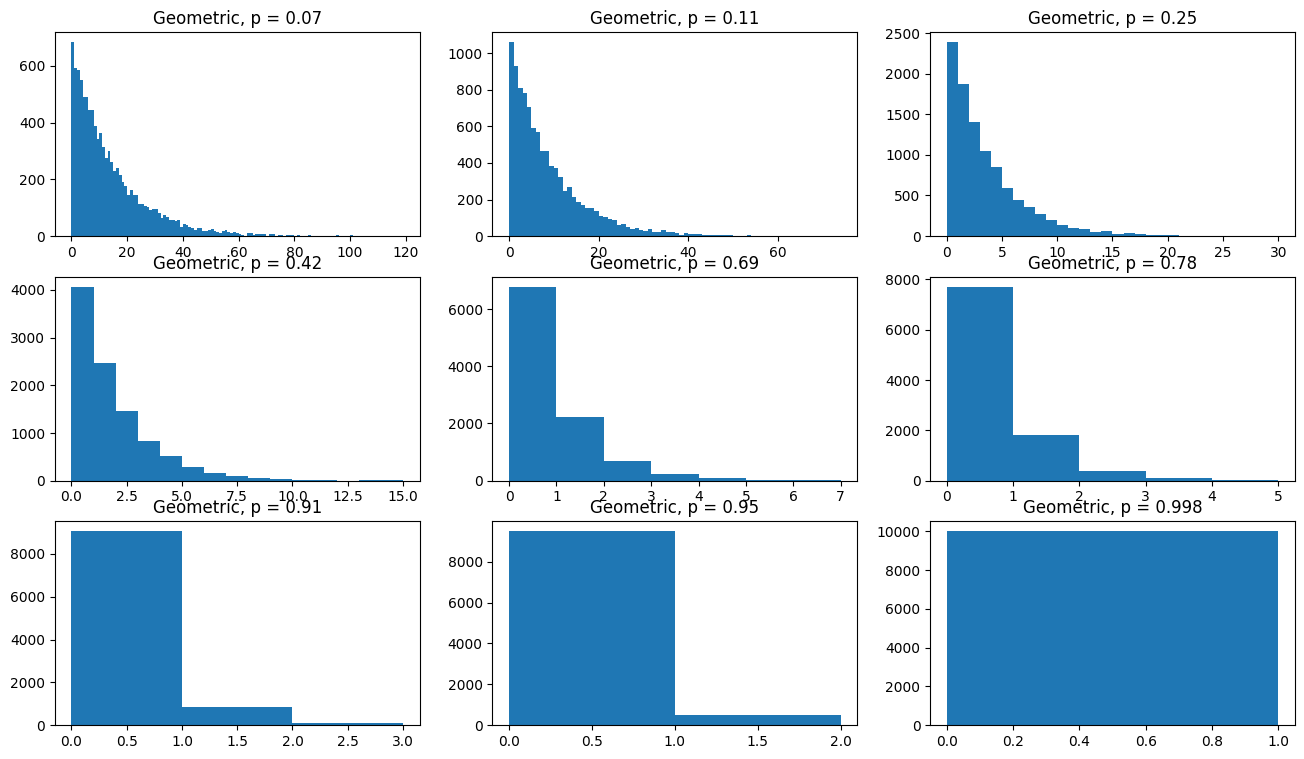

In [88]:
experimental_ps = [0.07, 0.11, 0.25, 0.42, 0.69, 0.78, 0.91, 0.95, 0.998]
uniform_nums = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

plt.figure(figsize=(16, 9))
for i in range(len(experimental_ps)):
    plt.subplot(3, 3, i + 1)
    geometric_nums = np.floor(np.log(uniform_nums) / np.log(1 - experimental_ps[i]))
    max_geometric = int(max(geometric_nums))
    print(f"Max of geometric dist_{i}: {max_geometric}")
    
    plt.title(f"Geometric, p = {experimental_ps[i]}")
    plt.hist(geometric_nums, bins=range(max_geometric + 1))

plt.show()

## Ex02
**The distribution should look something like:**

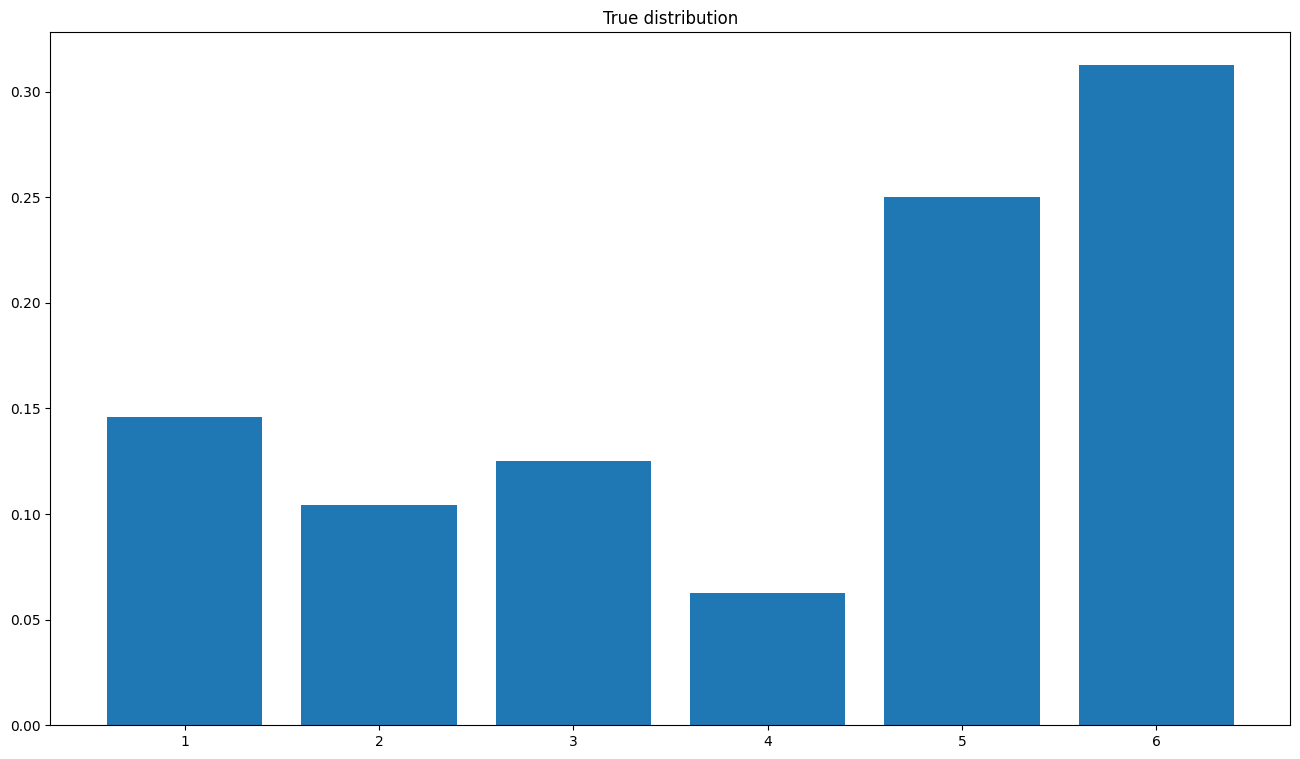

In [114]:
six_points = [7 / 48, 5 / 48, 1 / 8, 1 / 16, 1 / 4, 5 / 16]
k = len(six_points)

plt.figure(figsize=(16, 9))
plt.title('True distribution')
plt.bar(range(1,7),six_points)
plt.show()

### a) direct (crude) method

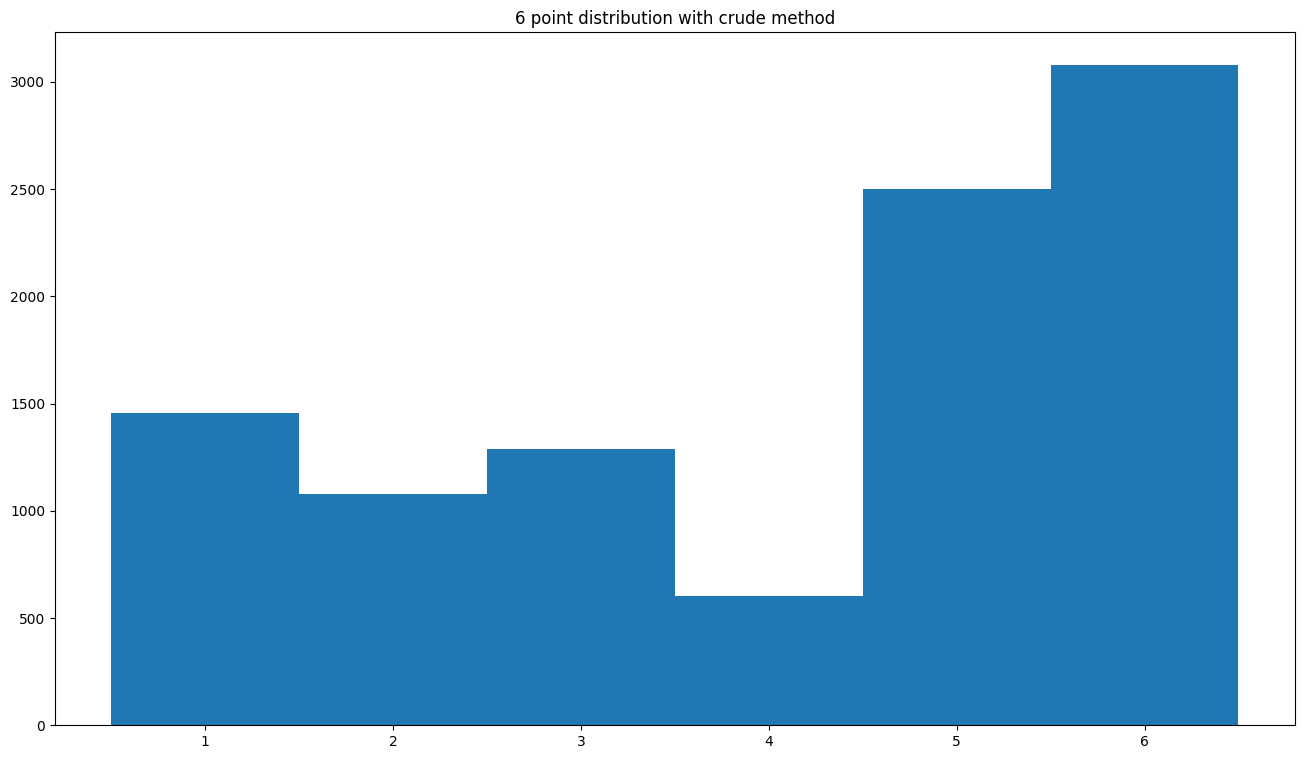

In [121]:
# Generate uniform samples
NUMS_TO_GENERATE = 10 ** 4
U = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)


X = np.zeros(NUMS_TO_GENERATE, dtype=np.int16)

for i in range(len(six_points)):
    #print(f"iter {i}: left {six_points[:i]} \tright {six_points[:(i+1)]}")
    p_bool = ((np.sum(six_points[:i]) < U) & (U <= np.sum(six_points[:(i+1)])))
    X[p_bool] = i + 1
    

bins = np.arange(1, k + 1.5) - 0.5
plt.figure(figsize=(16, 9))
plt.title(f"6 point distribution with crude method")
plt.hist(X, bins=bins)
plt.show()

### b) by using the the rejction method

#### This is a very naive way to do it

In [90]:
# Initially we just pick c to be equal to max(p_i) for i in range(k).
c = max(six_points)

k = len(six_points)

accepts = []
count = 0
while count < NUMS_TO_GENERATE:
    I = int(k * np.random.uniform(0.0, 1.0)) + 1 # <-- int always floors
    if np.random.uniform(0.0, 1.0) <= six_points[(I - 1)] / c:
        accepts.append(I)
        count += 1


**Plotting it:**


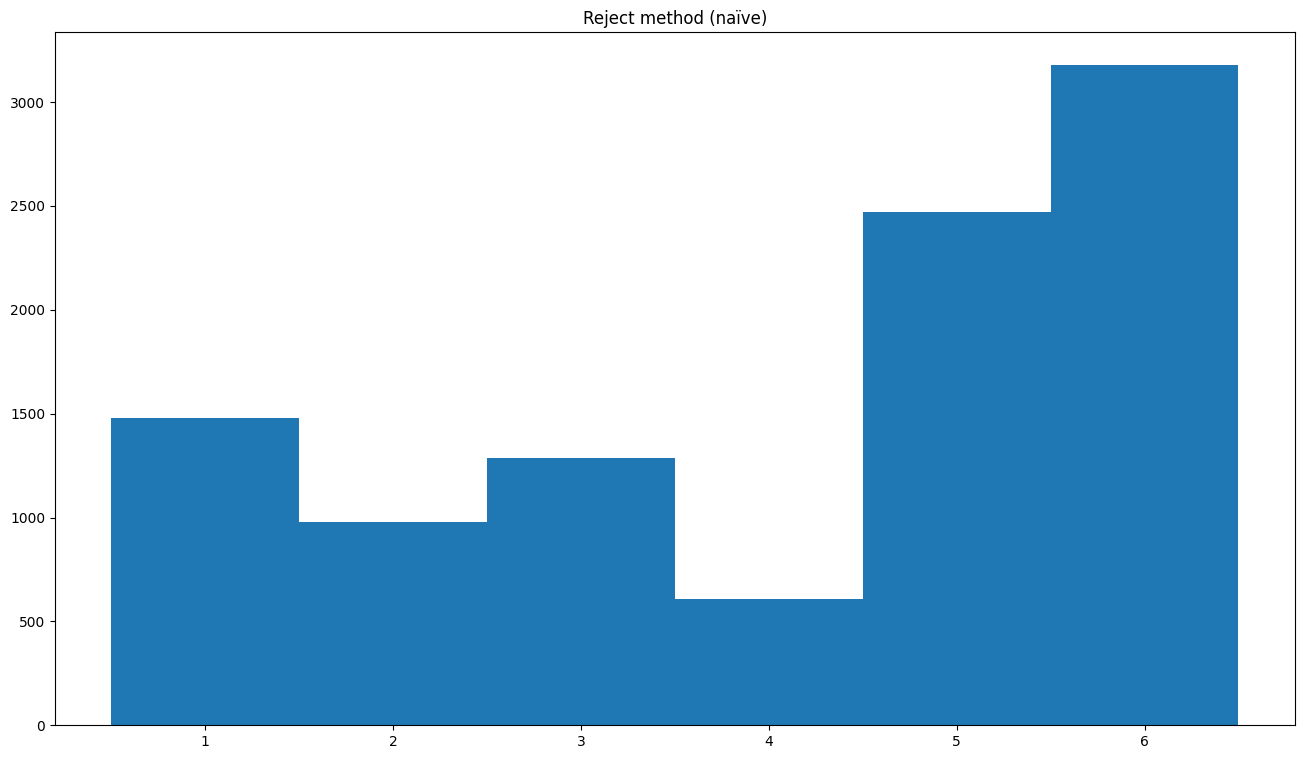

In [91]:
plt.figure(figsize=(16, 9))
plt.title(f"Reject method (naïve)")
plt.hist(accepts, bins=bins)
plt.show()

#### Might be better to initialize with two vectors

In [92]:
U_1 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)
U_2 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

accepts2 = []
while count < NUMS_TO_GENERATE:
    I = int(k * U_1[i]) + 1 # <-- int always floors
    if U_2[i] <= six_points[(I - 1)] / c:
        accepts2.append(I)
        count += 1
    if i == NUMS_TO_GENERATE - 1:
        U_1 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)
        U_2 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)
        i = 0

**Plotting it:**

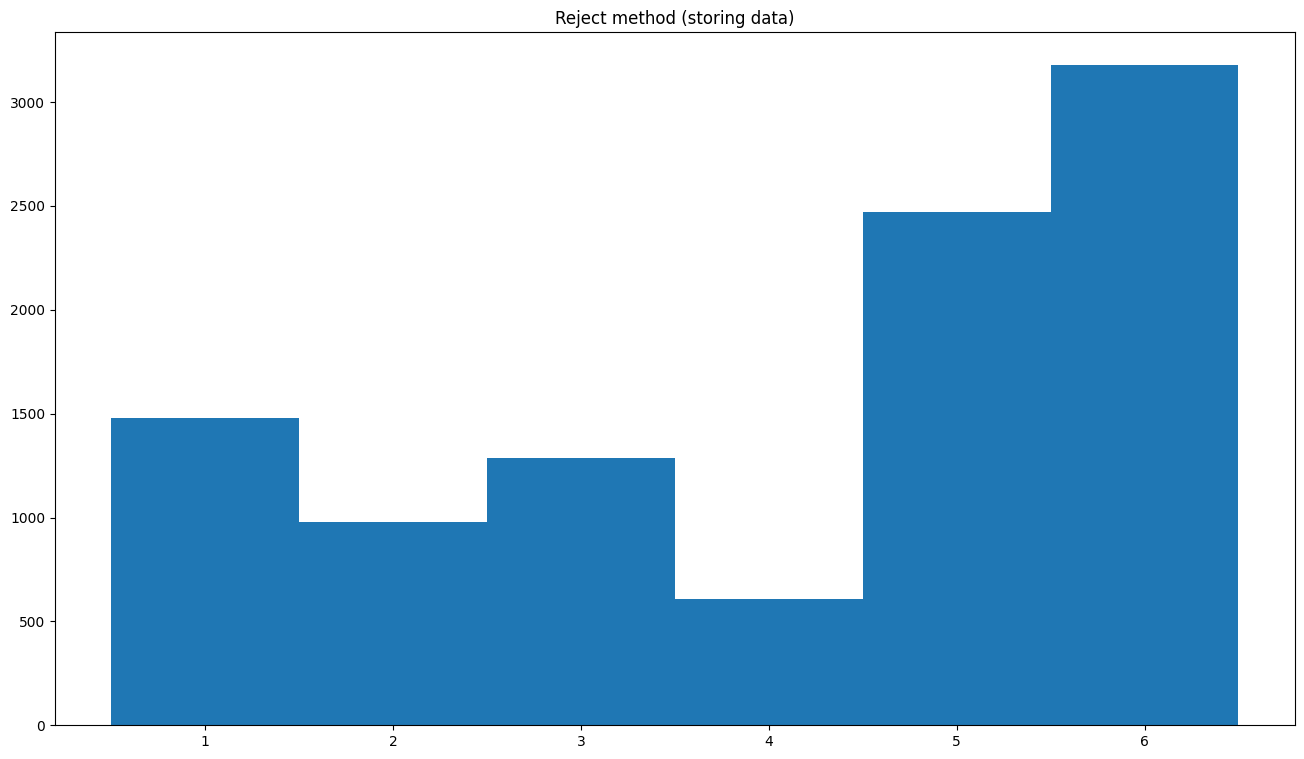

In [93]:
plt.figure(figsize=(16, 9))
plt.title(f"Reject method (storing data)")
plt.hist(accepts, bins=bins)
plt.show()

### c) by using the Alias method


In [132]:
def generate_F_L_table(probabilities : list[float]) -> tuple[list[float], list[int]]:
    """
        For the Alias method, the alias tables must be generated. These are generated here
        as per pseudo-code given on slides from the second lecture.
        (See slide 16 on 'slide3m1.pdf')
        
        :param probabilities: A list of probabilities for each of the k points
        
        :return: A tuple containing the alias tables F and L (both as lists)
    """
    
    # For some reason we have a machine epsilon in this algorithm:
    MACHINE_EPSILON = np.finfo(np.float64).eps

    # Bo said to initialize L to itself:
    k = len(probabilities)
    L = list(range(k))
    F = np.array([k * p for p in probabilities])

    # np.where returns a tuple, but our is one-dimensional, hence the indexing
    G = np.where(F >= 1)[0]
    S = np.where(F <= 1)[0]

    # print(f"S: {S}")
    # print(f"G: {G}")

    while S.size != 0:  # <-- Checking whether S is empty
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] -= (1 - F[j])
        if F[i] < 1 - MACHINE_EPSILON:
            G = np.delete(G, 0) # <-- this is equivalent to popping on a numpy array, probably terribly slow
            S = np.append(S, i) # <-- numpy appending is wack-a-doodles
        S = np.delete(S, 0) # <-- again: popping but in 'numpy'
    
    F = list(F)
    return F, L

In [137]:


F, L = generate_F_L_table(six_points)

U_1 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)
U_2 = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

samples = []
for i in range(NUMS_TO_GENERATE):
    I = int(k * U_1[i]) + 1
    if U_2[i] <= F[I - 1]:
        samples.append(I)
    else:
        samples.append(L[I - 1])


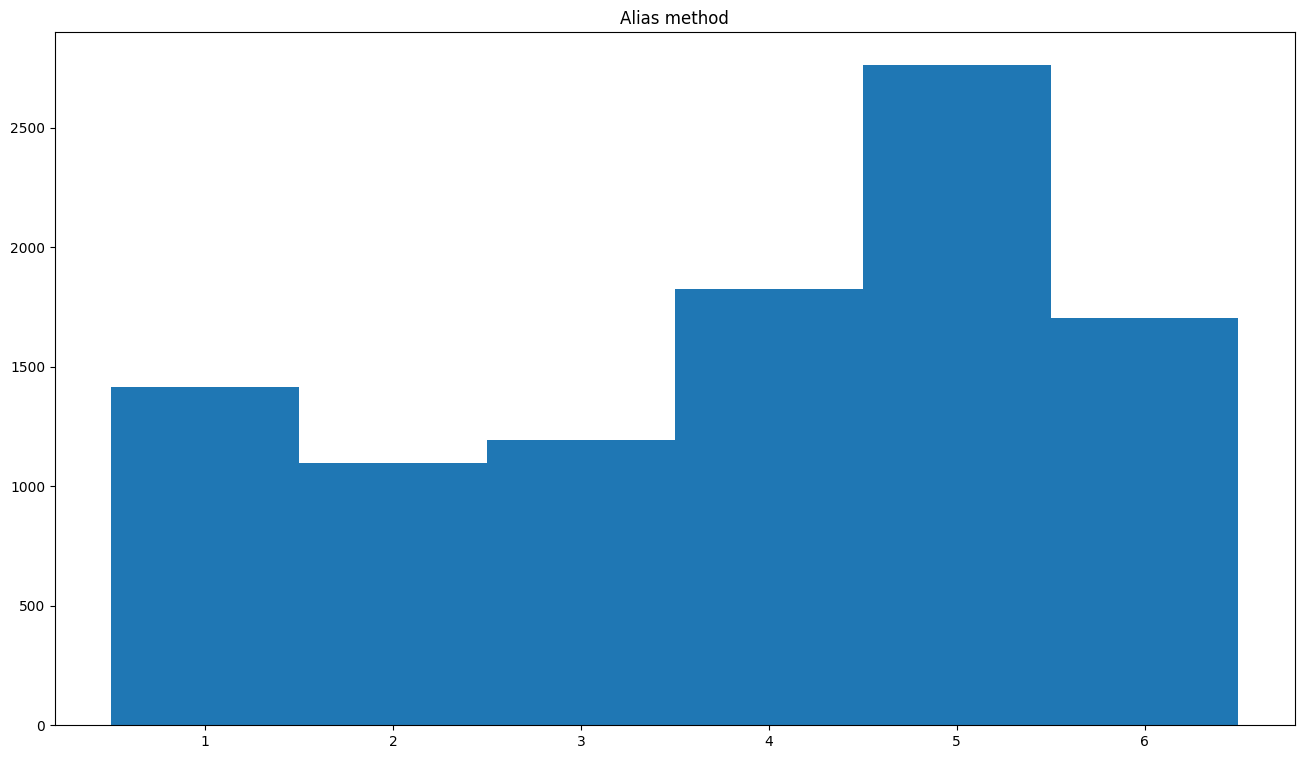

In [138]:
plt.figure(figsize=(16, 9))
plt.title(f"Alias method")
plt.hist(samples, bins=bins)
plt.show()

## Ex03 

**Compare the three different methods using adequate criteria, then discuss the results.**